In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display,Image

### Custom Training

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/YoloV8

/content/drive/MyDrive/YoloV8


In [ ]:
! ls


data.yaml  runs  test  train  valid  yolov8n.pt  yolov8s.pt


In [14]:
%cd /content/drive/MyDrive/YoloV8

!yolo task=detect mode=train model=yolov8n.pt data= data.yaml epochs=25 imgsz=224 plots=True

/content/drive/MyDrive/YoloV8
Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

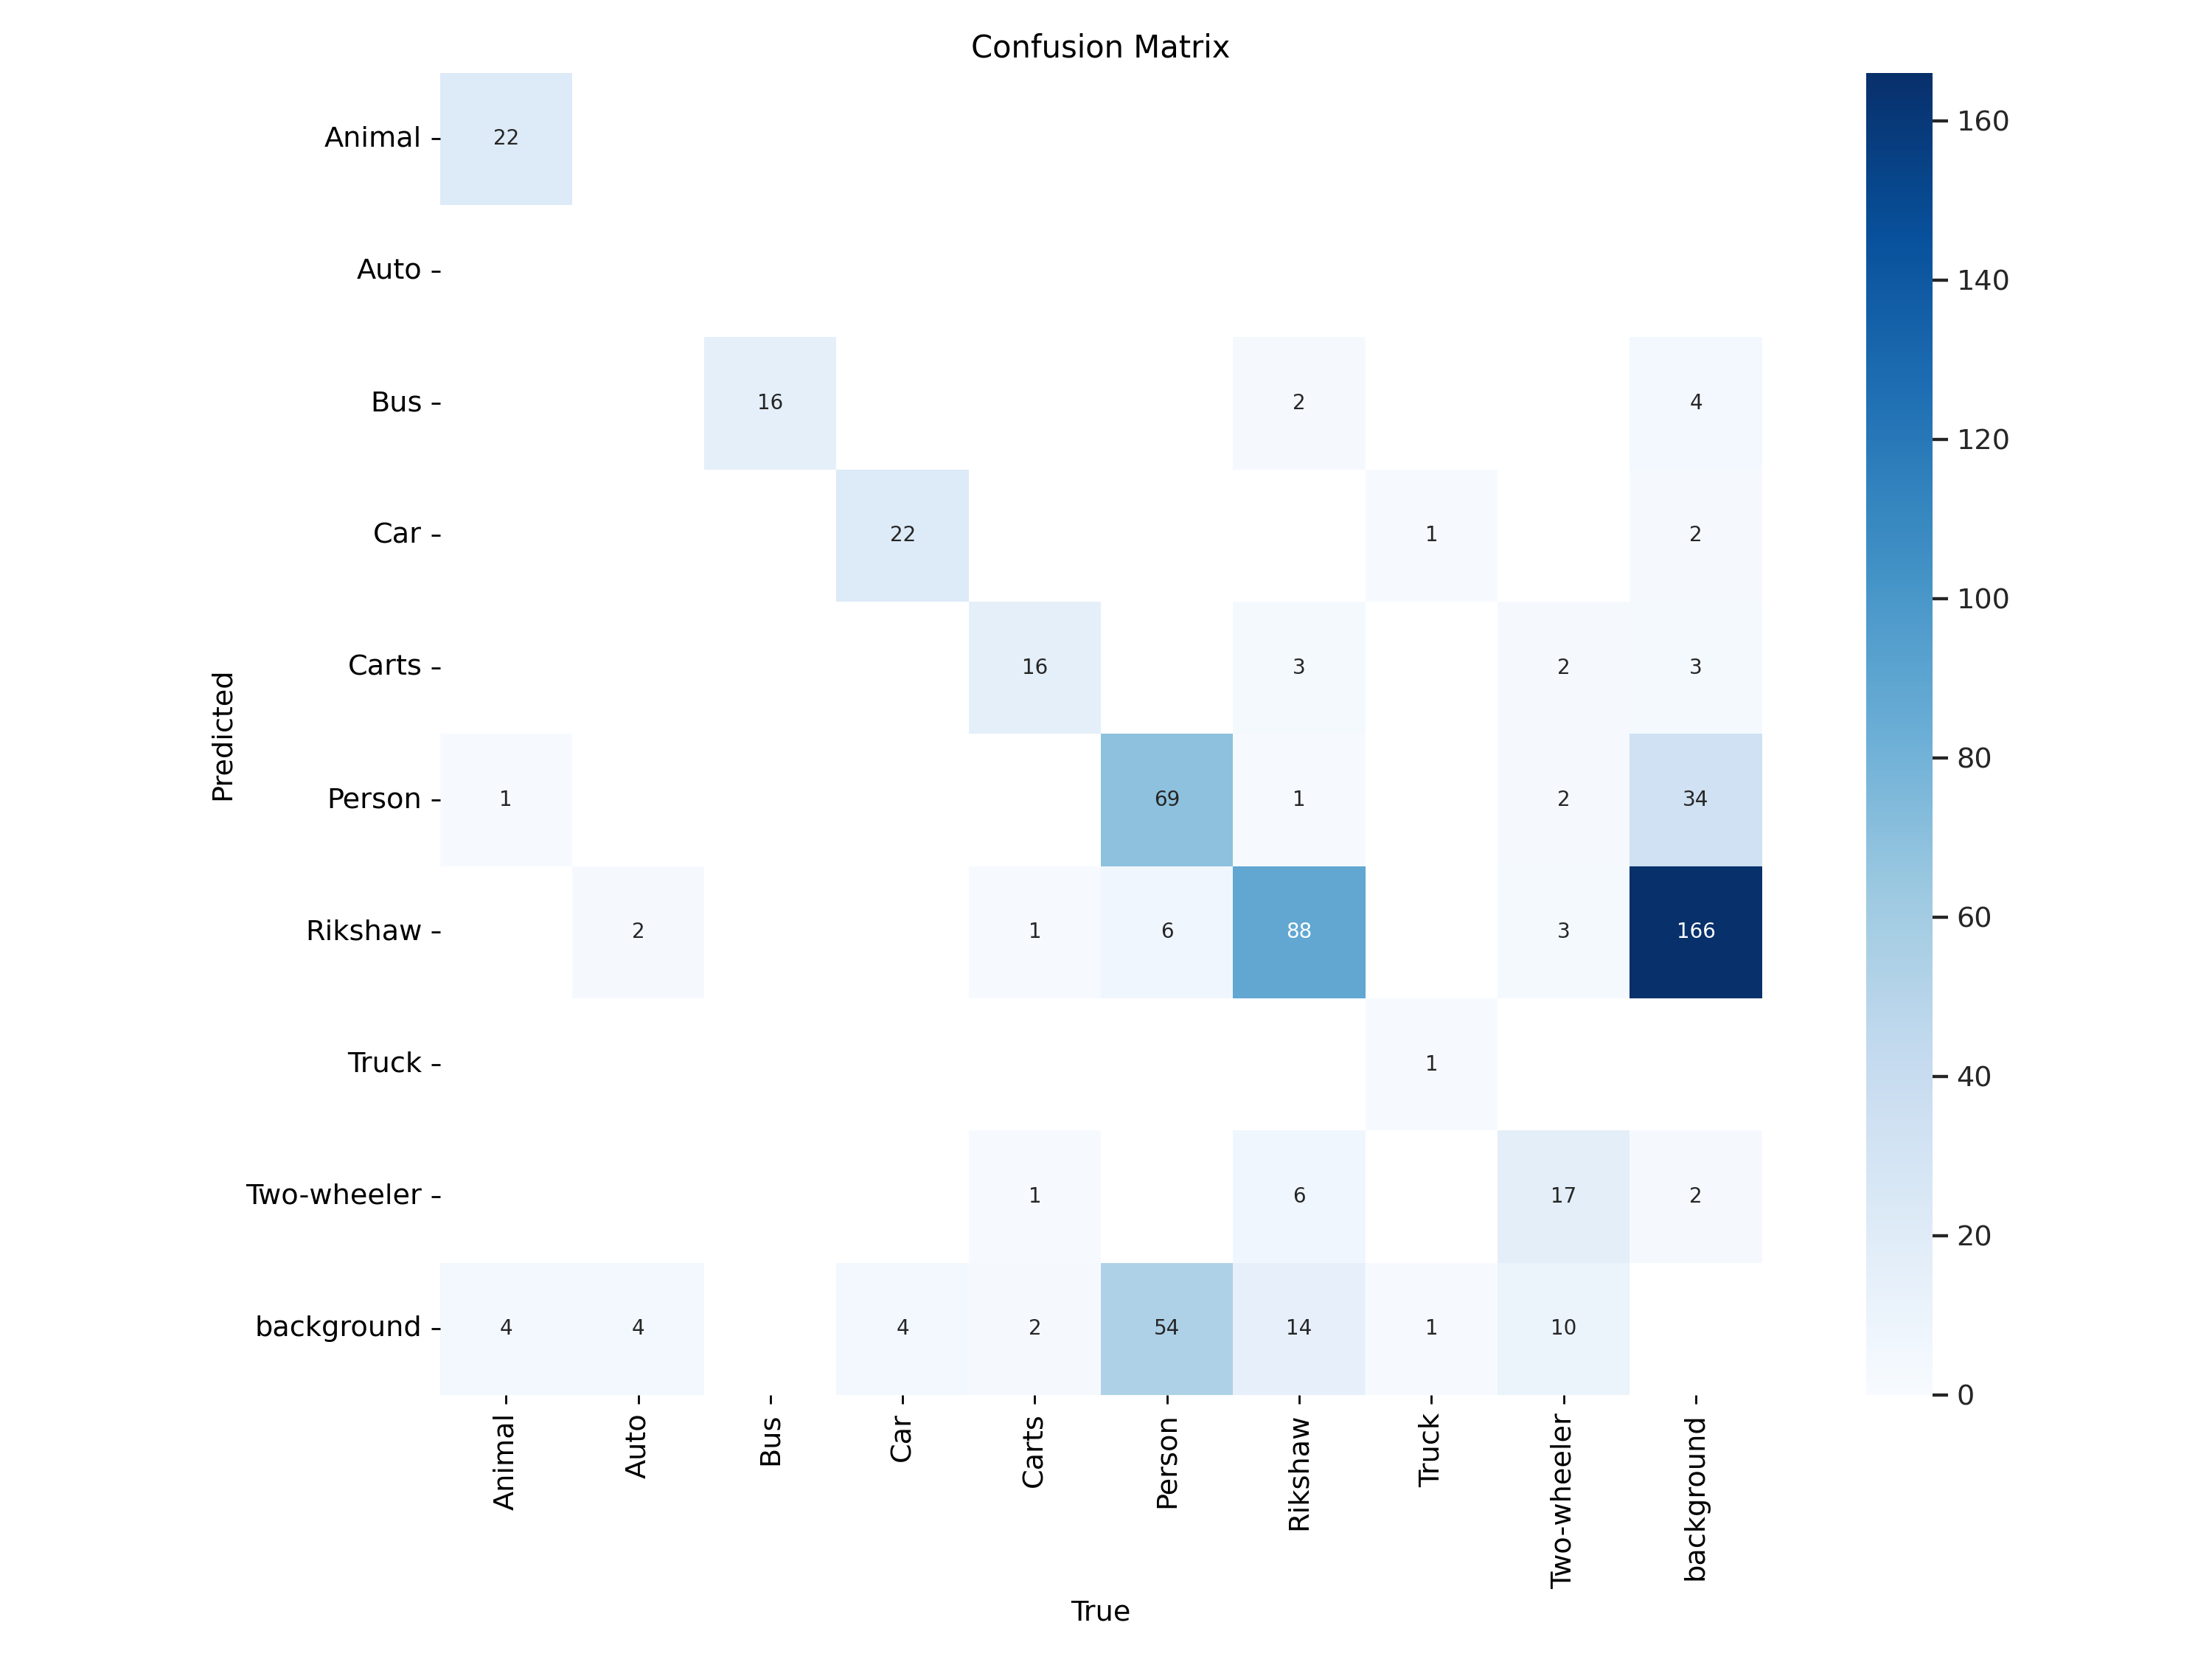

In [15]:
Image(filename='runs/detect/train2/confusion_matrix.png', width=600)

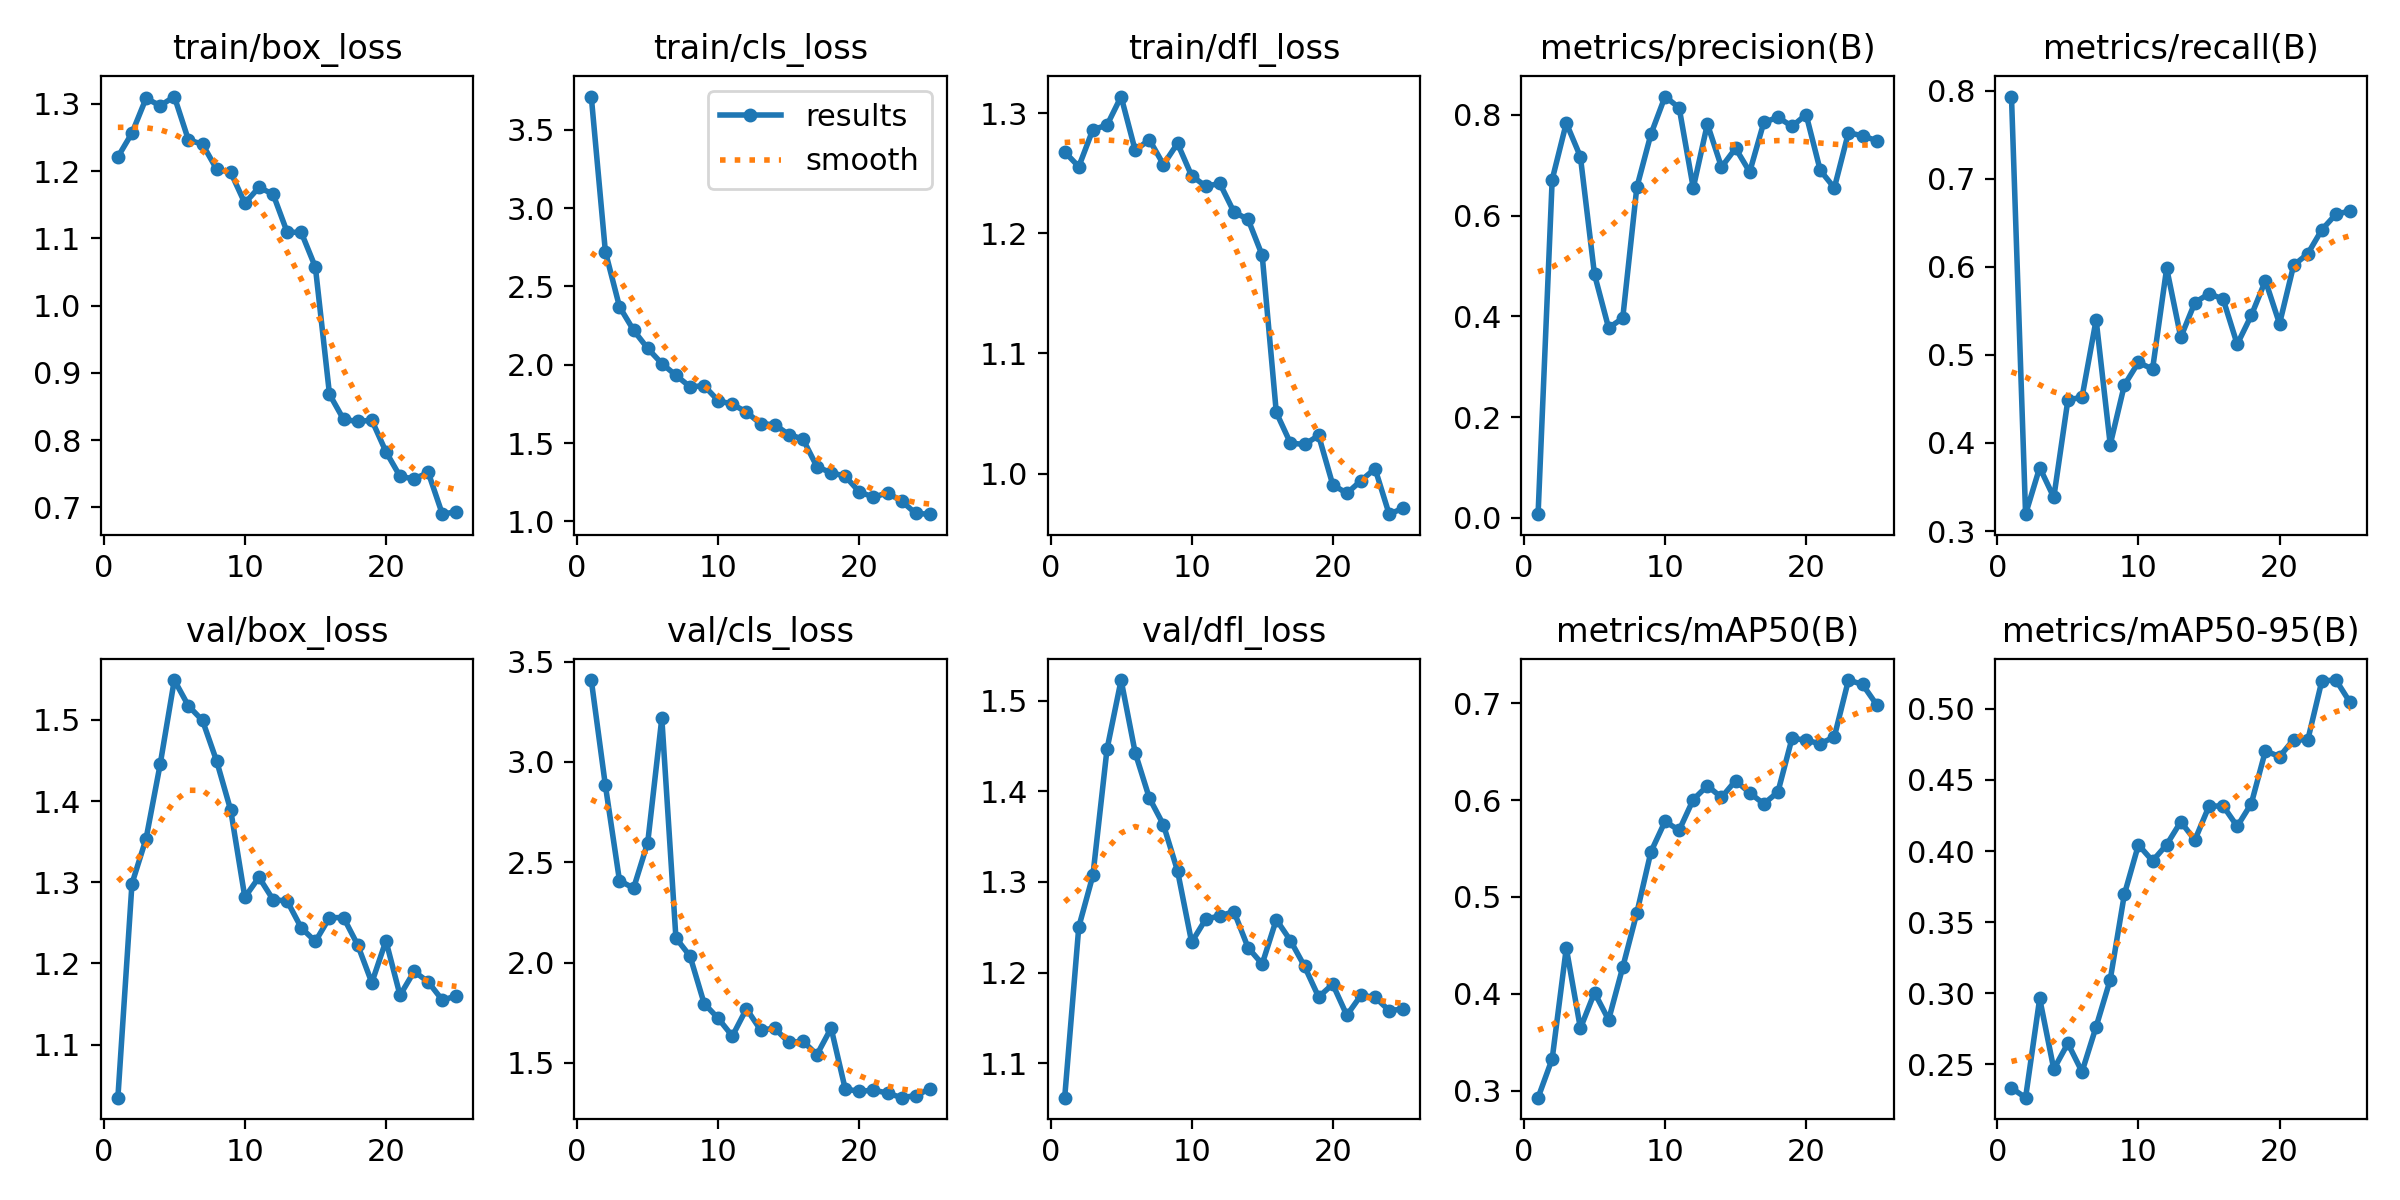

In [16]:
Image(filename='runs/detect/train2/results.png', width=600)

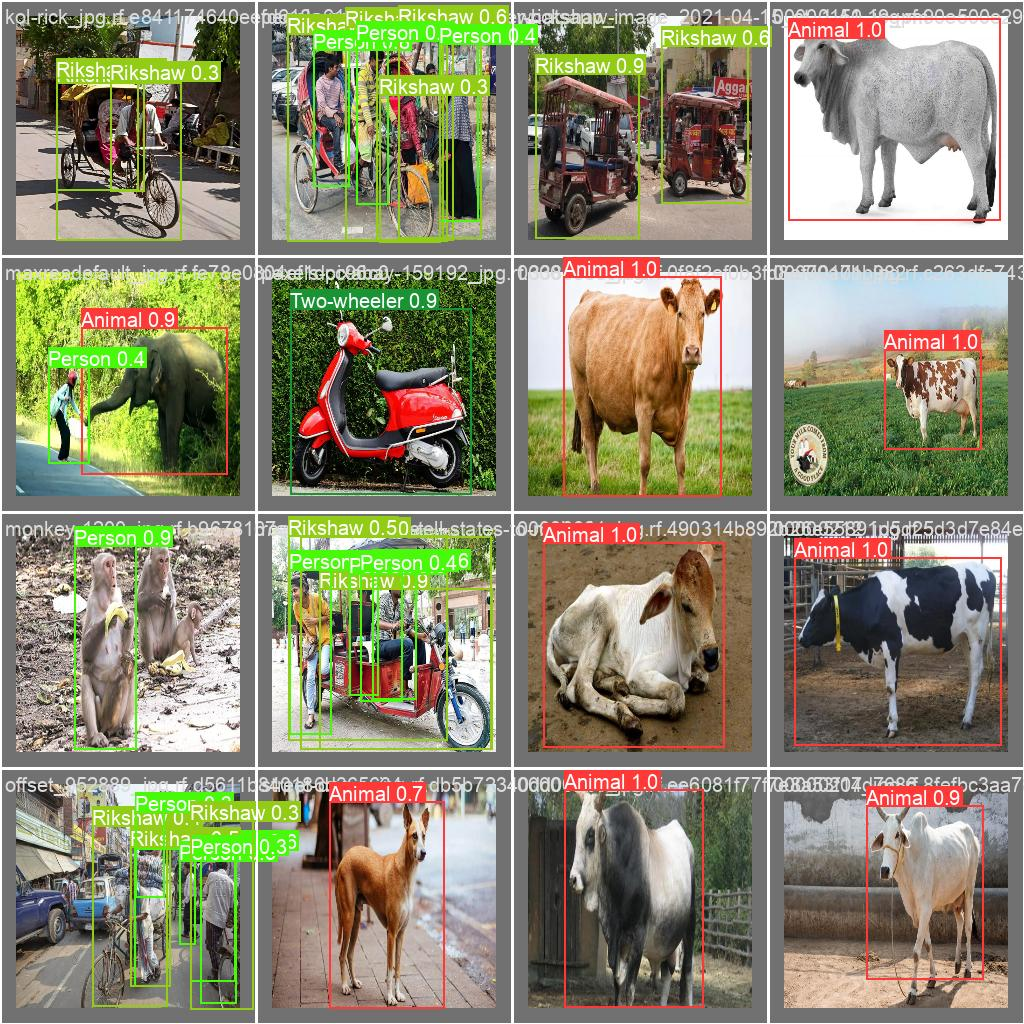

In [17]:
Image(filename='runs/detect/train2/val_batch0_pred.jpg', width=600)

In [18]:
!yolo task=detect mode=val model=runs/detect/train2/weights/best.pt data=data.yaml

Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007403 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/MyDrive/YoloV8/valid/labels.cache... 217 images, 0 backgrounds, 0 corrupt: 100% 217/217 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 14/14 [00:09<00:00,  1.50it/s]
                   all        217        375       0.76      0.661      0.719       0.52
                Animal        217         27      0.991      0.852      0.884      0.731
                  Auto        217          6          1          0    0.00396    0.00277
                   Bus        217         16      0.701          1      0.982      0.738
                   Car        217         26      0.845      0.846      0.937      0.754
                 Carts        217         20      0.692       0.85      0.817      0.583
                Person        217       

In [20]:
!yolo task=detect mode=predict model=runs/detect/train2/weights/best.pt conf=0.25 source=/content/drive/MyDrive/YoloV8/test/images

Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007403 parameters, 0 gradients, 8.1 GFLOPs

image 1/100 /content/drive/MyDrive/YoloV8/test/images/00000166_jpg.rf.9307ca28ee1783bea1e240dea367719b.jpg: 224x224 1 Animal, 8.7ms
image 2/100 /content/drive/MyDrive/YoloV8/test/images/13_png.rf.d00e7ffd1d7168a94c771ae34bdc3967.jpg: 224x224 1 Person, 17.8ms
image 3/100 /content/drive/MyDrive/YoloV8/test/images/164_png.rf.a43ff65b4e88f1dc6bb56790e1e4cbe5.jpg: 224x224 2 Cars, 1 Person, 10.3ms
image 4/100 /content/drive/MyDrive/YoloV8/test/images/179_png.rf.dd10a662e6824d23f60386fd56c46aa0.jpg: 224x224 1 Person, 7.1ms
image 5/100 /content/drive/MyDrive/YoloV8/test/images/18car_jpg.rf.c23968e0df06ad3a380d58c73b228ece.jpg: 224x224 1 Car, 9.0ms
image 6/100 /content/drive/MyDrive/YoloV8/test/images/20220815_19_17_35_502_000_nNovHPpHmHgQvkzfItJqA00AOFC2_T_4160_3120-1-_jpg.rf.91a4972592a6a2e845fa4916209c0299.jpg: 224x224 1 Two-wh

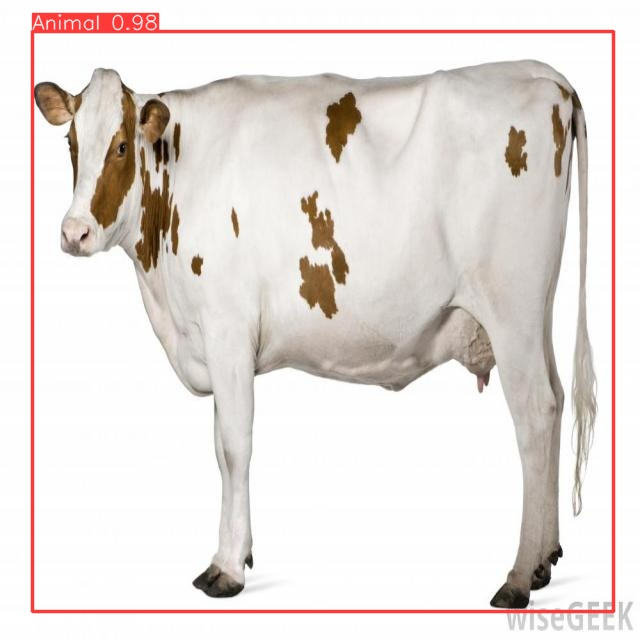

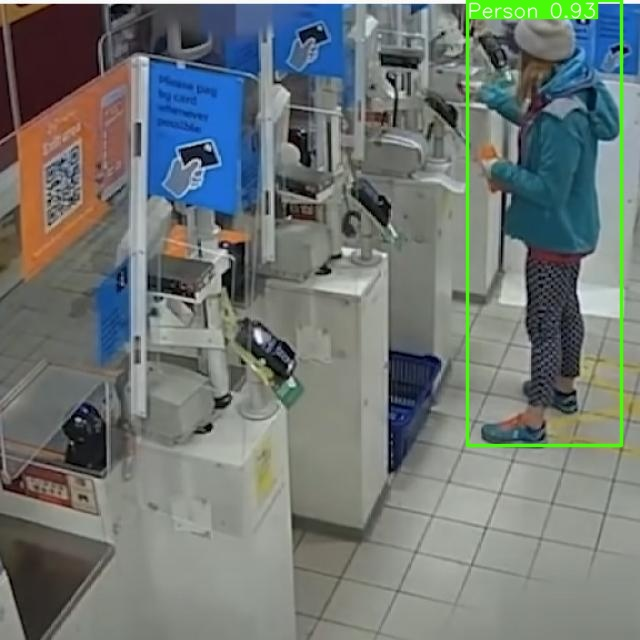

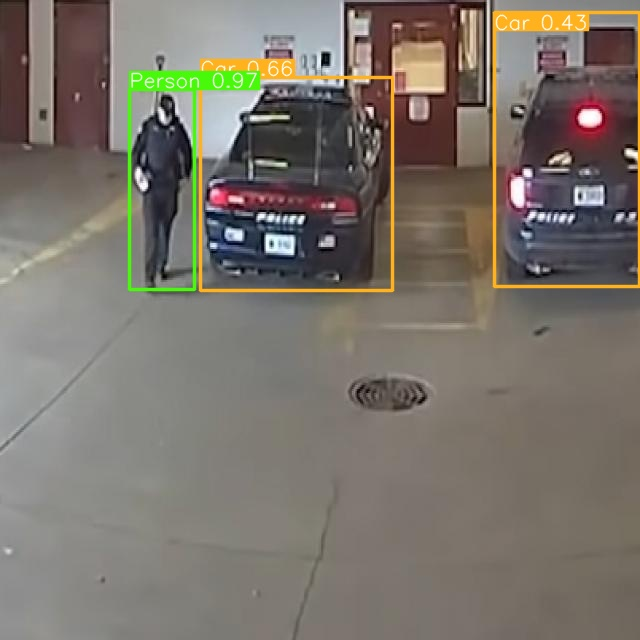

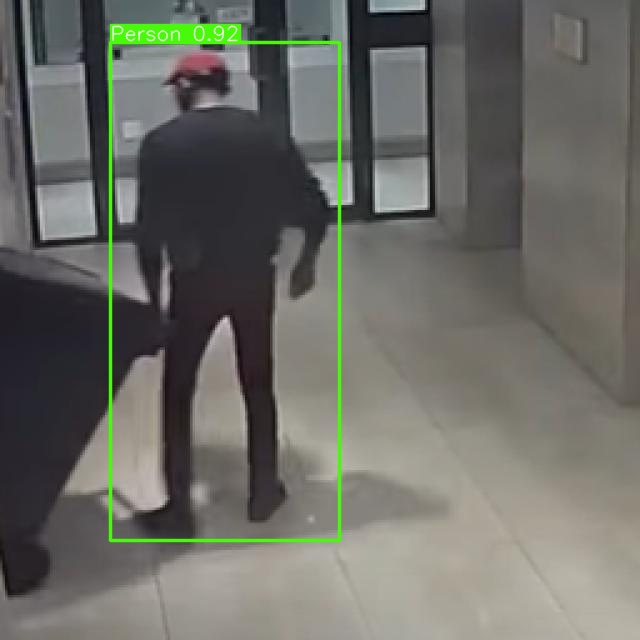

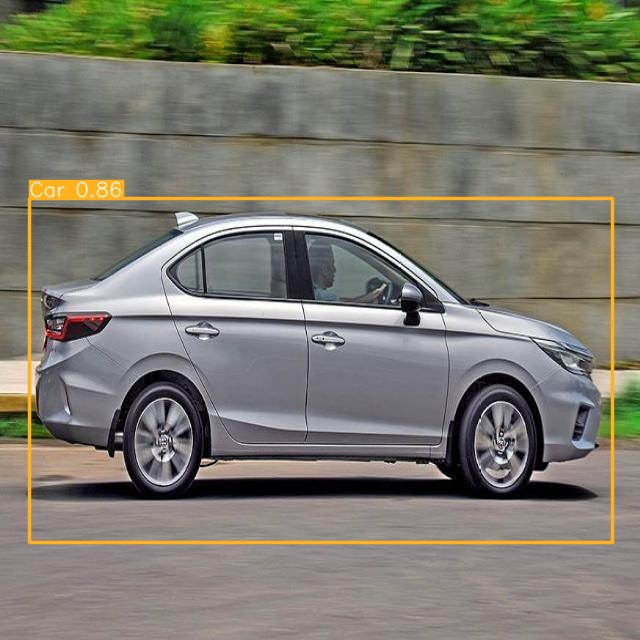

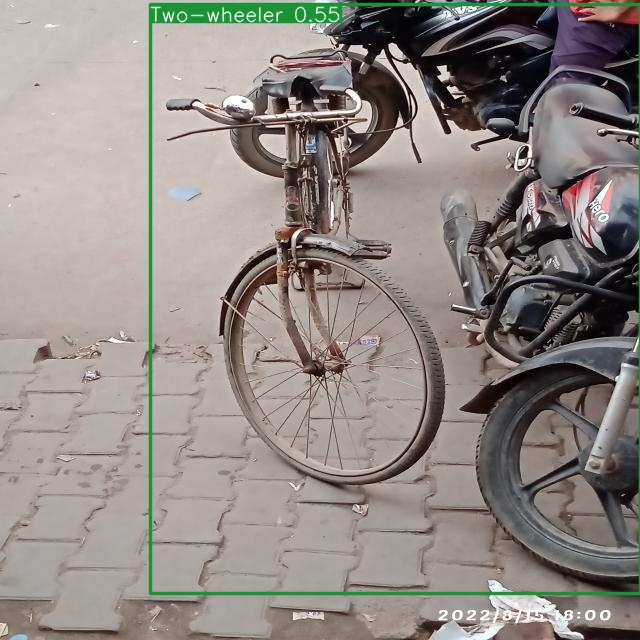

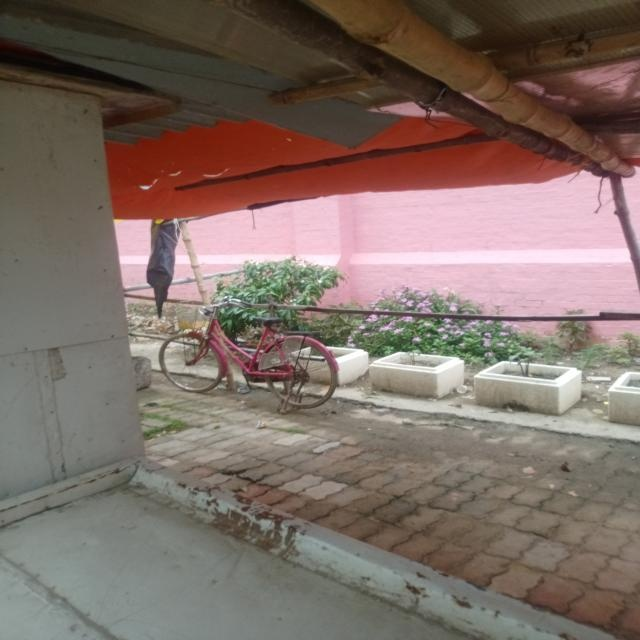

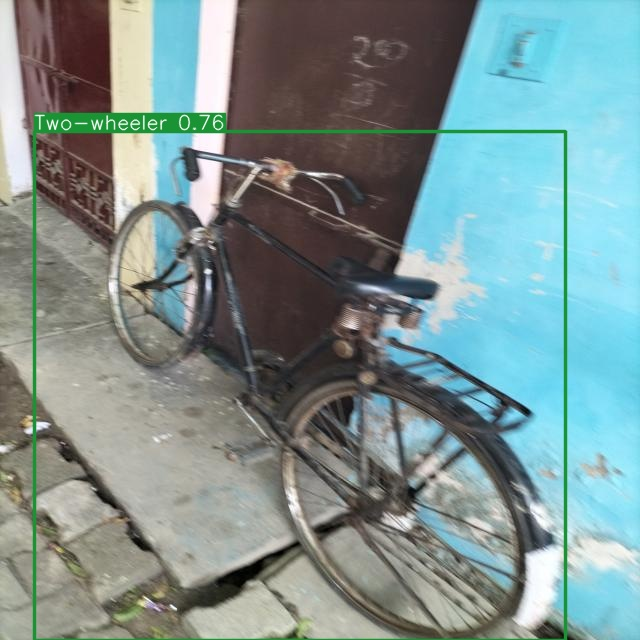

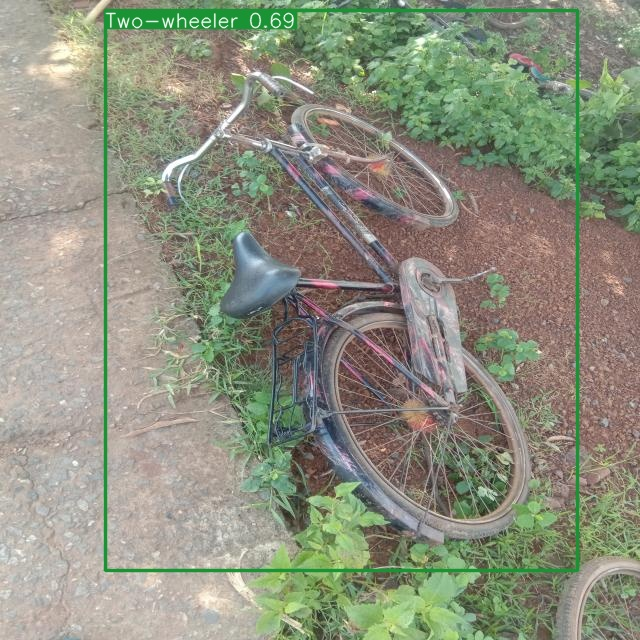

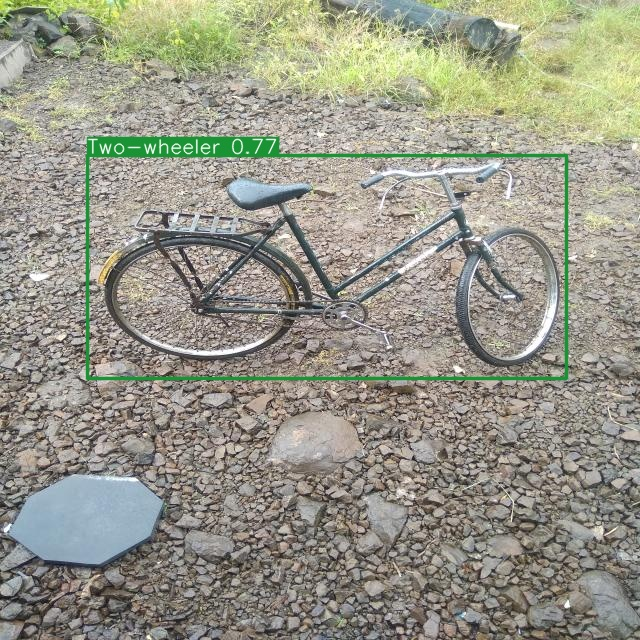

In [24]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")
